In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, norm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
dfs = pd.read_excel("DataSetVentes.xlsx", sheet_name=None)

In [3]:
df_pants_sales = dfs["Pants sales"]
print(df_pants_sales.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01             2.23         3.84             1.48              1.12   
1 2016-06-01             2.14         3.85             1.44              1.09   
2 2016-07-01             1.72         3.30             1.19              0.97   
3 2016-08-01             1.46         2.81             1.00              0.87   
4 2016-09-01             1.86         3.05             1.17              1.02   

   X10/ million  
0          1.19  
1          1.16  
2          1.03  
3          0.93  
4          1.07  


In [4]:
print(df_pants_sales[df_pants_sales.duplicated()])

Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


In [5]:
df_sweater_sales = dfs["Sweater sales"]
print(df_sweater_sales.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01             0.63         1.11             3.66              4.71   
1 2016-06-01             0.46         0.82             2.72              3.91   
2 2016-07-01             0.42         0.81             2.70              3.55   
3 2016-08-01             0.91         1.86             6.60              5.33   
4 2016-09-01             1.90         3.78            12.69              8.13   

   X10/ million  
0          5.87  
1          4.97  
2          4.69  
3          7.20  
4         10.92  


In [6]:
print(df_sweater_sales[df_sweater_sales.duplicated()])

Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


In [7]:
df_dress_sales = dfs["Dress sales."]
print(df_dress_sales.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01             5.29        11.38             3.03              1.21   
1 2016-06-01             5.66        12.45             3.21              1.24   
2 2016-07-01             4.87        11.70             2.89              1.18   
3 2016-08-01             3.66         8.41             2.06              0.97   
4 2016-09-01             3.35         7.24             1.87              0.92   

   X10/ million  
0          1.98  
1          2.06  
2          1.88  
3          1.59  
4          1.51  


In [8]:
print(df_dress_sales[df_dress_sales.duplicated()])
df_dress_sales = df_dress_sales.drop_duplicates()
print(df_dress_sales[df_dress_sales.duplicated()])

         Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  \
20 2017-12-01             1.81         3.94             0.95   

    X9/ 100 thousand  X10/ million  
20               0.5          1.06  
Empty DataFrame
Columns: [Date, S/ billion Yuan, X4/ billion, X8/ 10
million, X9/ 100 thousand, X10/ million]
Index: []


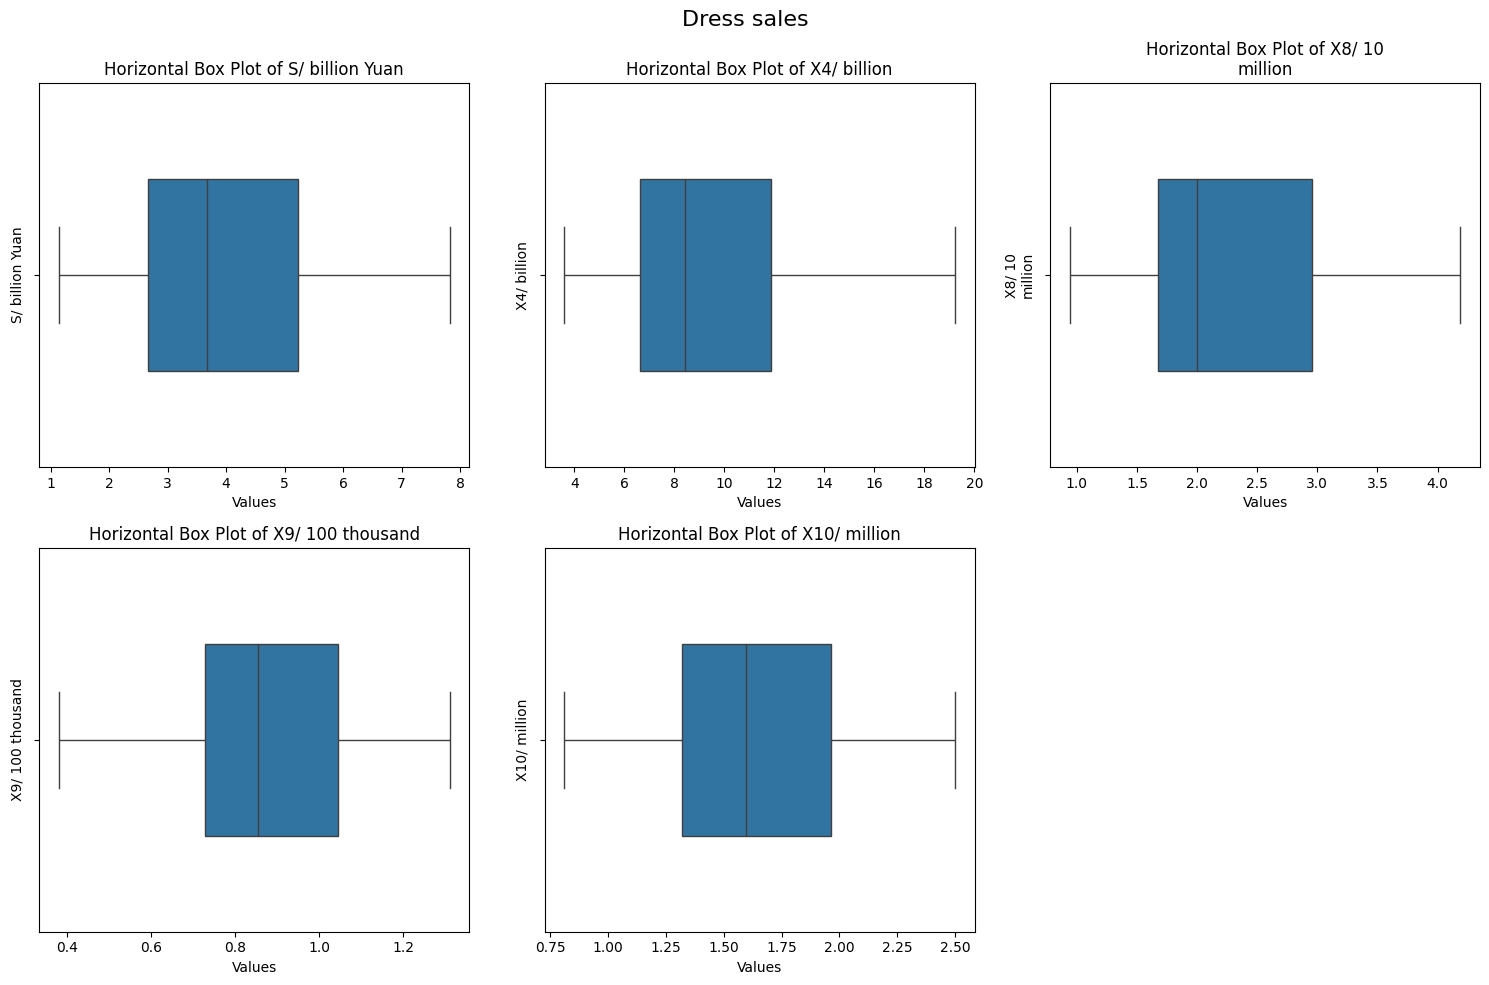

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Dress sales', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(df_dress_sales.columns[1:7]):
    sns.boxplot(data=df_dress_sales[column], orient='h', ax=axes[i], width=0.5)
    axes[i].set_title(f'Horizontal Box Plot of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)


for j in range(len(df_dress_sales.columns[1:]), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


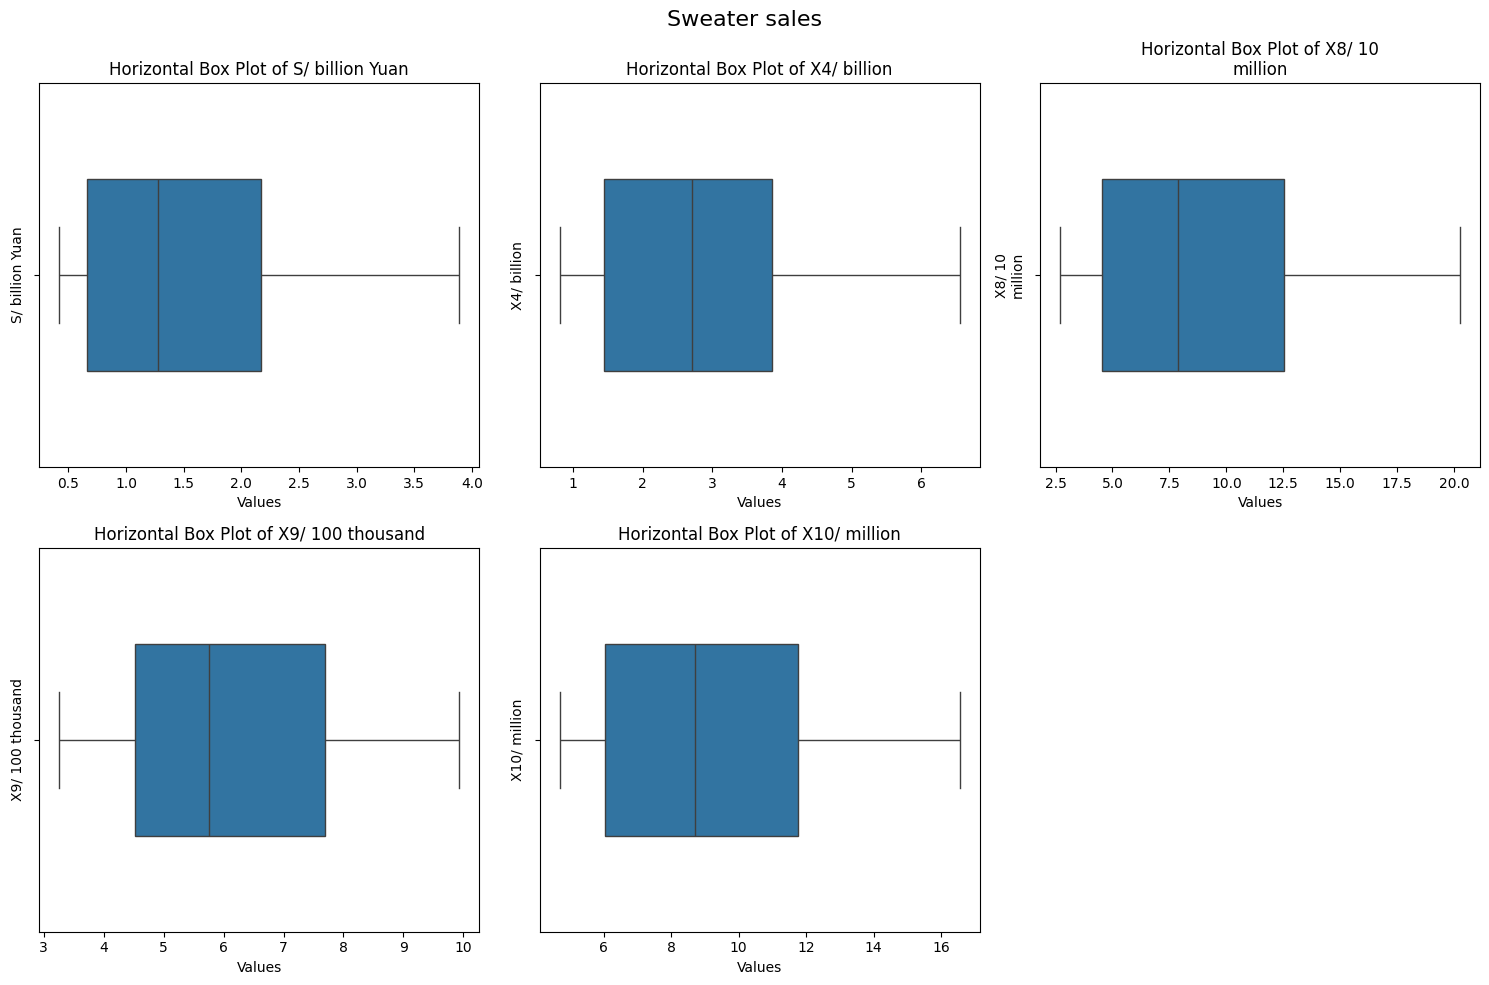

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Sweater sales', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(df_sweater_sales.columns[1:7]):
    sns.boxplot(data=df_sweater_sales[column], orient='h', ax=axes[i], width=0.5)
    axes[i].set_title(f'Horizontal Box Plot of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)


for j in range(len(df_sweater_sales.columns[1:]), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()





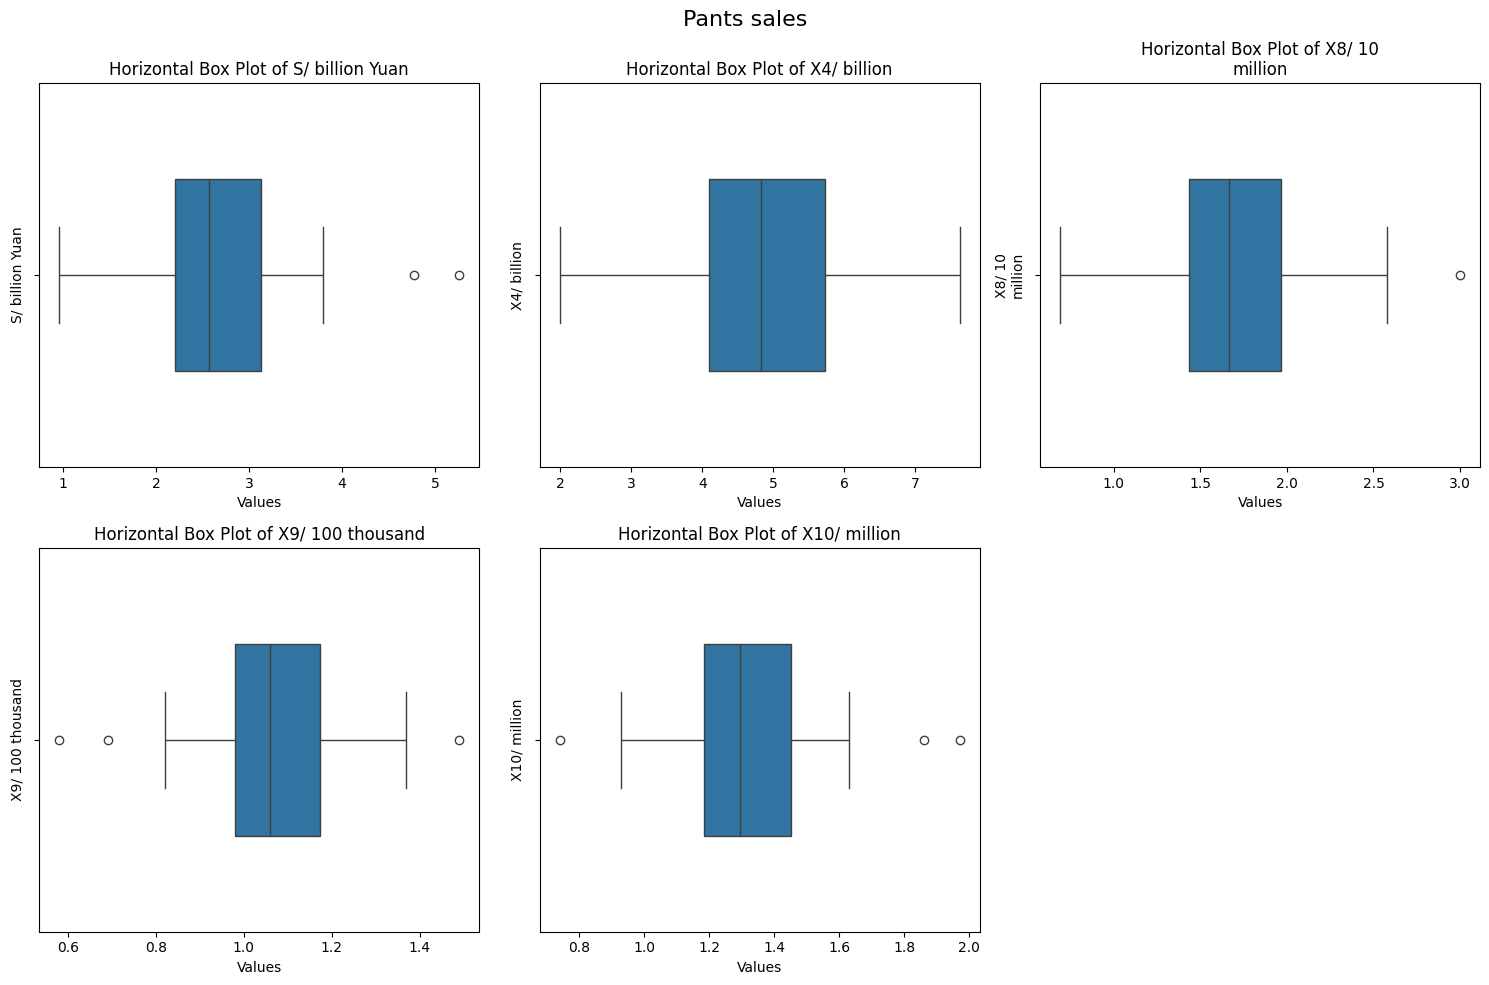

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Pants sales', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(df_pants_sales.columns[1:7]):
    sns.boxplot(data=df_pants_sales[column], orient='h', ax=axes[i], width=0.5)
    axes[i].set_title(f'Horizontal Box Plot of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)


for j in range(len(df_pants_sales.columns[1:]), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

def remove_outliers(df):
    df_cleaned = df.copy()
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  

            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            
            IQR = Q3 - Q1
            

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned


In [12]:
df_pants_sales = remove_outliers(df_pants_sales)

In [13]:
df_dress_sales = remove_outliers(df_dress_sales)

In [14]:
df_sweater_sales = remove_outliers(df_sweater_sales)

In [15]:
def center_data(dataframe):
    
    numeric_cols = dataframe.select_dtypes(include=[np.number])
    
    df_centered_numeric = numeric_cols - numeric_cols.mean()
    

    non_numeric_cols = dataframe.select_dtypes(exclude=[np.number])
    df_centered = pd.concat([non_numeric_cols, df_centered_numeric], axis=1)
    
    return df_centered


df_pants_centered = center_data(df_pants_sales)


print(df_pants_centered.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01        -0.340968     -1.07129        -0.172258          0.054516   
1 2016-06-01        -0.430968     -1.06129        -0.212258          0.024516   
2 2016-07-01        -0.850968     -1.61129        -0.462258         -0.095484   
3 2016-08-01        -1.110968     -2.10129        -0.652258         -0.195484   
4 2016-09-01        -0.710968     -1.86129        -0.482258         -0.045484   

   X10/ million  
0     -0.095161  
1     -0.125161  
2     -0.255161  
3     -0.355161  
4     -0.215161  


In [16]:
df_sweater_centered = center_data(df_sweater_sales)

print(df_pants_centered.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01        -0.340968     -1.07129        -0.172258          0.054516   
1 2016-06-01        -0.430968     -1.06129        -0.212258          0.024516   
2 2016-07-01        -0.850968     -1.61129        -0.462258         -0.095484   
3 2016-08-01        -1.110968     -2.10129        -0.652258         -0.195484   
4 2016-09-01        -0.710968     -1.86129        -0.482258         -0.045484   

   X10/ million  
0     -0.095161  
1     -0.125161  
2     -0.255161  
3     -0.355161  
4     -0.215161  


In [17]:
df_dress_centered = center_data(df_dress_sales)

print(df_dress_centered.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01         1.268333     1.618056         0.673333          0.335278   
1 2016-06-01         1.638333     2.688056         0.853333          0.365278   
2 2016-07-01         0.848333     1.938056         0.533333          0.305278   
3 2016-08-01        -0.361667    -1.351944        -0.296667          0.095278   
4 2016-09-01        -0.671667    -2.521944        -0.486667          0.045278   

   X10/ million  
0      0.330833  
1      0.410833  
2      0.230833  
3     -0.059167  
4     -0.139167  


In [18]:
def standardize_data(dataframe):

    numeric_cols = dataframe.select_dtypes(include=[np.number])
    
    df_standardized_numeric = numeric_cols / numeric_cols.std()
    
    non_numeric_cols = dataframe.select_dtypes(exclude=[np.number])
    df_standardized = pd.concat([non_numeric_cols, df_standardized_numeric], axis=1)
    
    return df_standardized

df_pants_standardized = standardize_data(df_pants_centered)

print(df_pants_standardized.head())


        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01        -0.578730    -0.953618        -0.460032          0.448540   
1 2016-06-01        -0.731489    -0.944716        -0.566856          0.201710   
2 2016-07-01        -1.444362    -1.434303        -1.234505         -0.785609   
3 2016-08-01        -1.885664    -1.870481        -1.741918         -1.608376   
4 2016-09-01        -1.206737    -1.656843        -1.287917         -0.374226   

   X10/ million  
0     -0.541303  
1     -0.711951  
2     -1.451426  
3     -2.020252  
4     -1.223895  


In [19]:
df_sweater_standardized = standardize_data(df_sweater_centered)

print(df_sweater_standardized.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01        -0.963984    -1.131977        -1.052261         -0.741293   
1 2016-06-01        -1.150856    -1.321184        -1.237557         -1.166154   
2 2016-07-01        -1.194827    -1.327708        -1.241500         -1.357341   
3 2016-08-01        -0.656193    -0.642650        -0.472715         -0.412026   
4 2016-09-01         0.432067     0.610028         0.727772          1.074986   

   X10/ million  
0     -1.009709  
1     -1.286717  
2     -1.372897  
3     -0.600354  
4      0.544610  


In [20]:
df_dress_standardized = standardize_data(df_dress_centered)

print(df_dress_standardized.head())

        Date  S/ billion Yuan  X4/ billion  X8/ 10\nmillion  X9/ 100 thousand  \
0 2016-05-01         0.763232     0.378374         0.705122          1.429965   
1 2016-06-01         0.985883     0.628589         0.893619          1.557915   
2 2016-07-01         0.510493     0.453205         0.558512          1.302014   
3 2016-08-01        -0.217636    -0.316146        -0.310672          0.406361   
4 2016-09-01        -0.404182    -0.589744        -0.509642          0.193110   

   X10/ million  
0      0.807063  
1      1.002222  
2      0.563115  
3     -0.144336  
4     -0.339495  


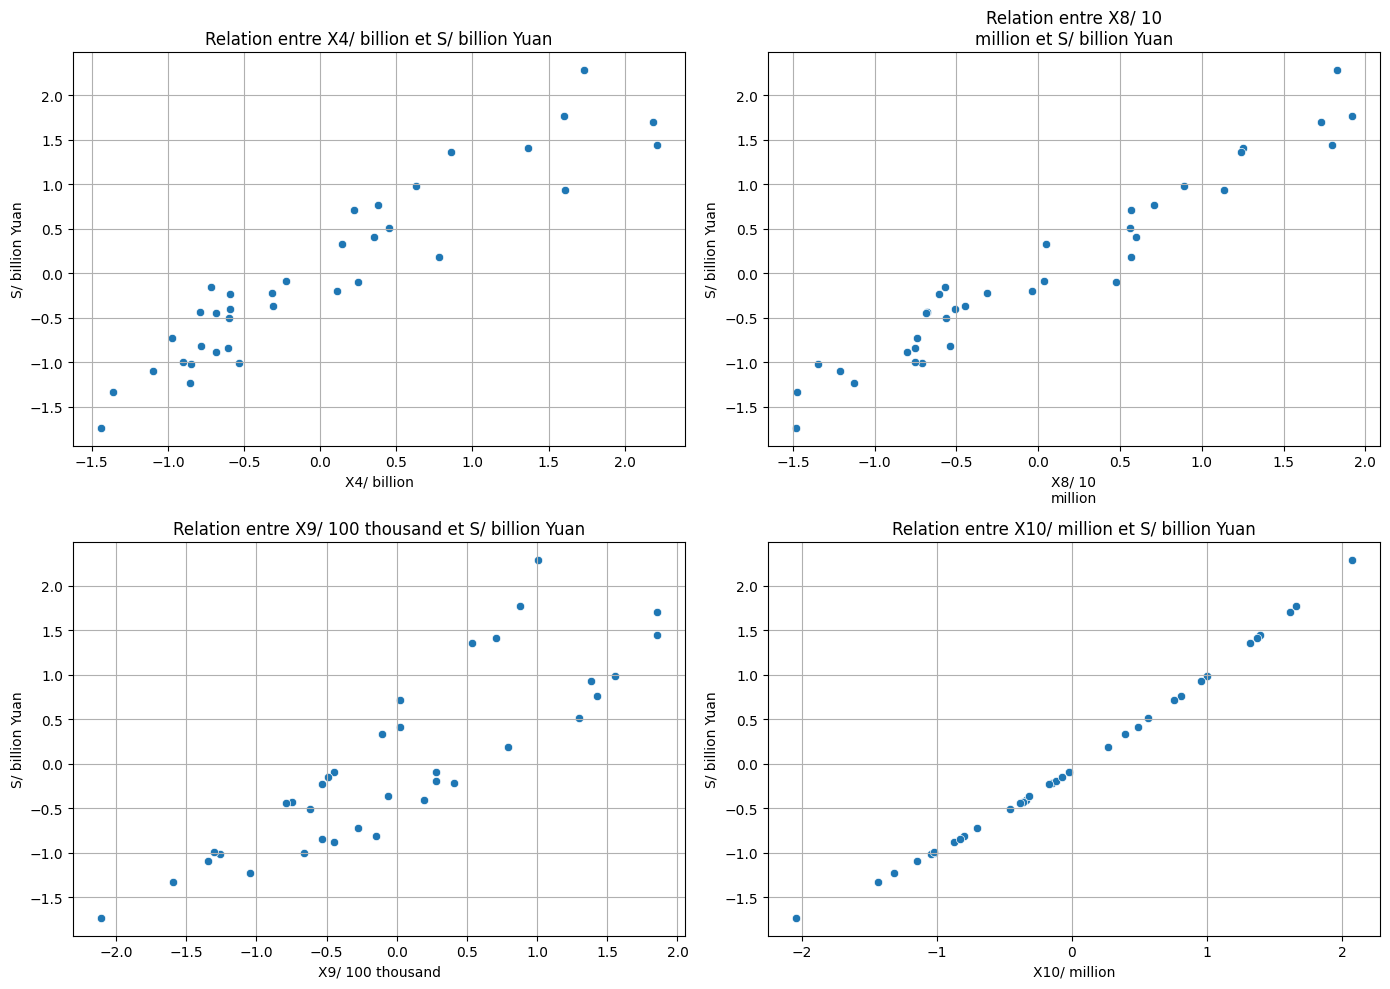

In [21]:
def visualize_relationship(dataframe, target_col):

    numeric_cols = dataframe.select_dtypes(include=[np.number]).drop(columns=[target_col], errors='ignore')

    num_plots = len(numeric_cols.columns)
    ncols = 2
    nrows = (num_plots + ncols - 1) // ncols


    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 10))


    axes = axes.flatten()


    for i, col in enumerate(numeric_cols.columns):
        ax = axes[i]
        sns.scatterplot(x=dataframe[col], y=dataframe[target_col], ax=ax)
        ax.set_title(f'Relation entre {col} et {target_col}')
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)
        ax.grid(True)


    for j in range(num_plots, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


visualize_relationship(df_dress_standardized, target_col='S/ billion Yuan')

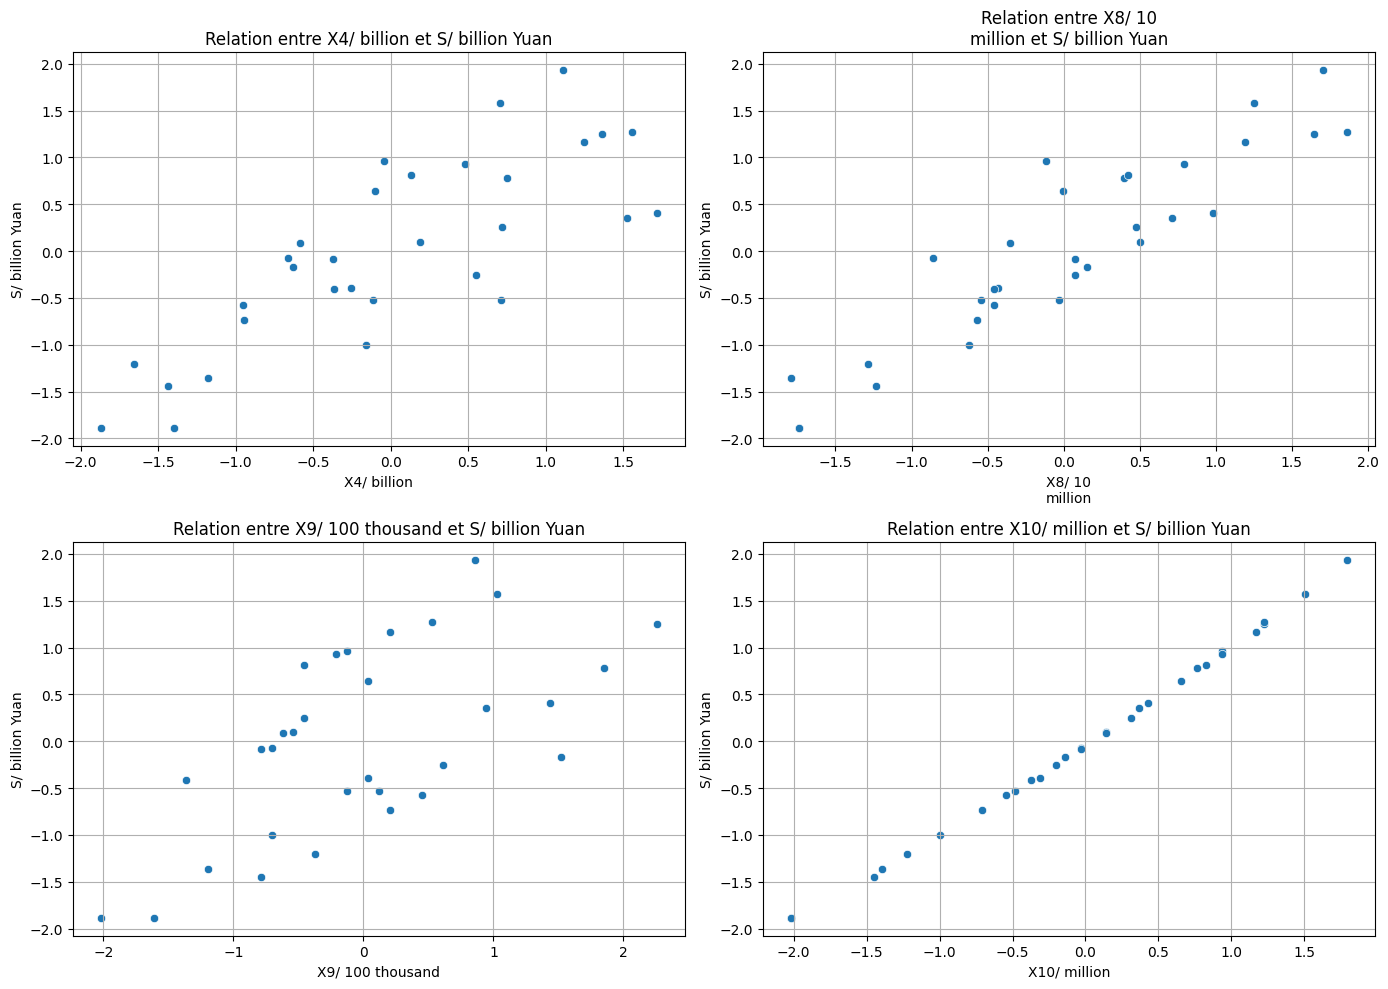

In [22]:
visualize_relationship(df_pants_standardized, target_col='S/ billion Yuan')

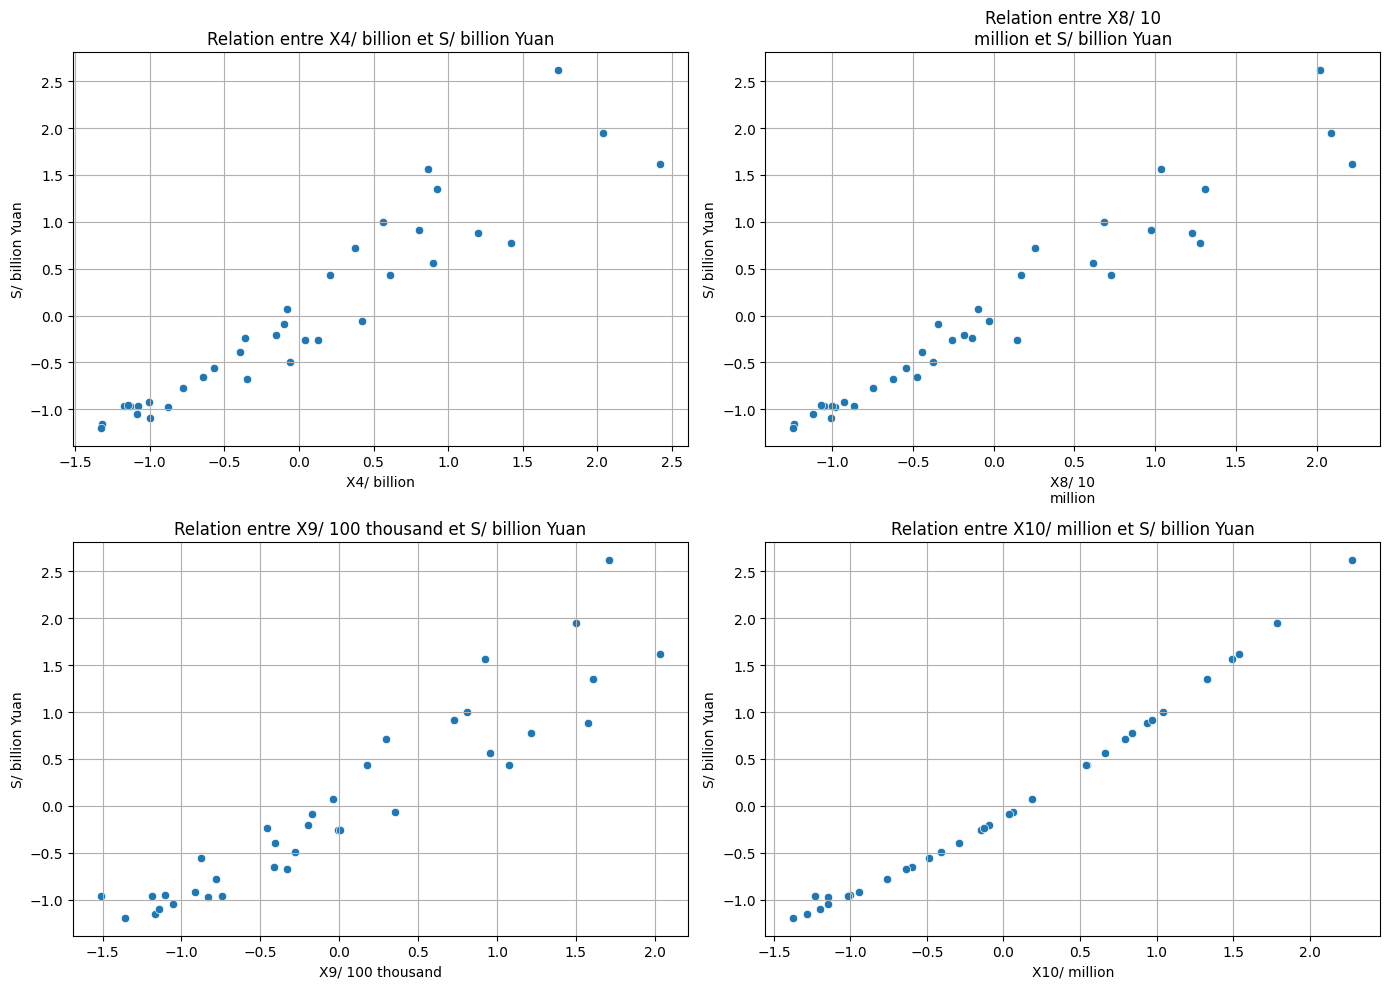

In [23]:
visualize_relationship(df_sweater_standardized, target_col='S/ billion Yuan')

In [24]:
def pearson_correlation(x, y):
    x = np.array(x)
    y = np.array(y)
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    
    denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
    
    if denominator == 0:
        return 0
    
    return numerator / denominator

def calculate_correlation(df, target_col):
    numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=[target_col], errors='ignore')
    
    correlations = {}
    
    for col in numeric_cols.columns:
        correlation = pearson_correlation(df[col], df[target_col])
        correlations[col] = correlation
    
    correlation_df = pd.DataFrame(list(correlations.items()), columns=['Column', 'Correlation'])
    
    correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()
    correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False).drop(columns=['Abs_Correlation'])
    
    return correlation_df

def draw_correlation_heatmap(df, figsize=(10, 8)):

    numeric_df = df.select_dtypes(include=[np.number])
    
    corr_matrix = np.zeros((len(numeric_df.columns), len(numeric_df.columns)))
    for i, col1 in enumerate(numeric_df.columns):
        for j, col2 in enumerate(numeric_df.columns):
            corr_matrix[i, j] = pearson_correlation(numeric_df[col1], numeric_df[col2])
    
    corr_df = pd.DataFrame(corr_matrix, 
                          index=numeric_df.columns,
                          columns=numeric_df.columns)
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr_df, 
                annot=True,
                cmap='coolwarm',
                vmin=-1, 
                vmax=1,
                center=0,
                fmt='.2f',
                square=True)
    
    plt.title('Heatmap')
    plt.tight_layout()
    

In [25]:
calculate_correlation(df_dress_sales, 'S/ billion Yuan')

,Column,Correlation
3,X10/ million,0.996222
1,X8/ 10\nmillion,0.971121
0,X4/ billion,0.937870
2,X9/ 100 thousand,0.858903


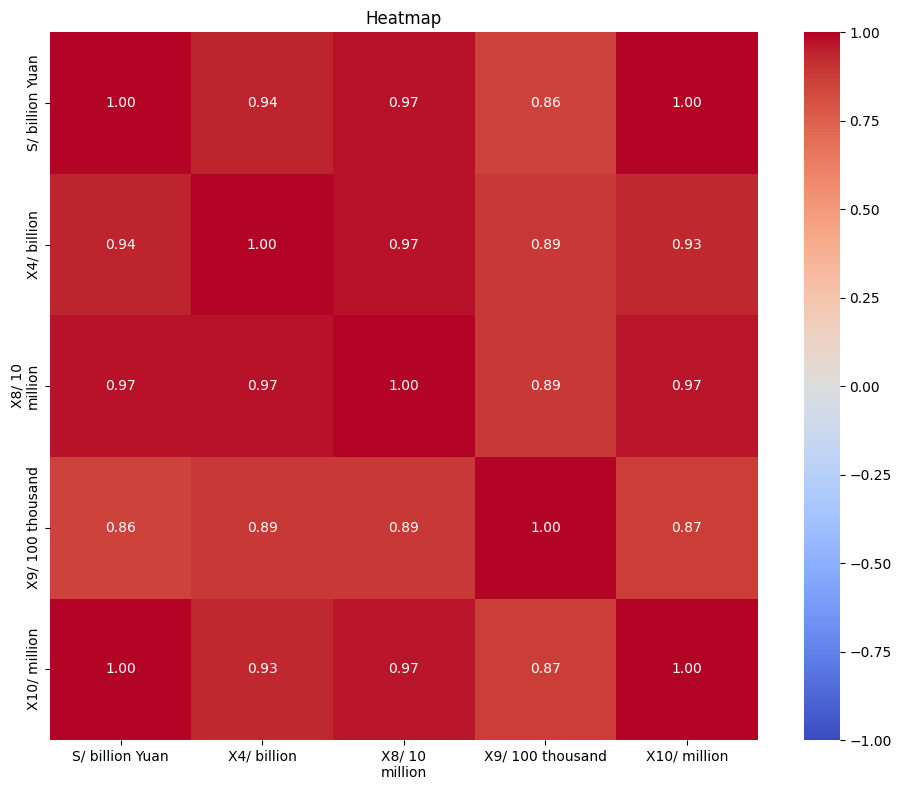

In [26]:
draw_correlation_heatmap(df_dress_sales.drop(columns=['Date']))

In [27]:
calculate_correlation(df_pants_sales, 'S/ billion Yuan')

,Column,Correlation
3,X10/ million,0.998352
1,X8/ 10\nmillion,0.916305
0,X4/ billion,0.801243
2,X9/ 100 thousand,0.636353


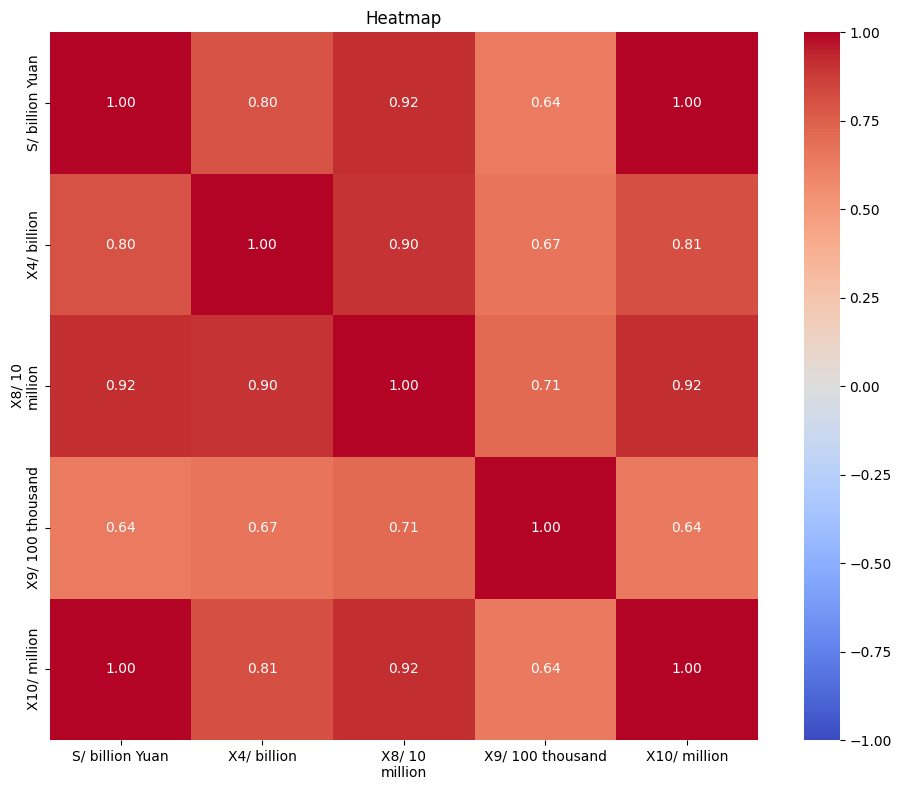

In [28]:
draw_correlation_heatmap(df_pants_sales.drop(columns=['Date']))

In [29]:
calculate_correlation(df_sweater_sales,'S/ billion Yuan')

,Column,Correlation
3,X10/ million,0.992755
1,X8/ 10\nmillion,0.967848
0,X4/ billion,0.940921
2,X9/ 100 thousand,0.937245


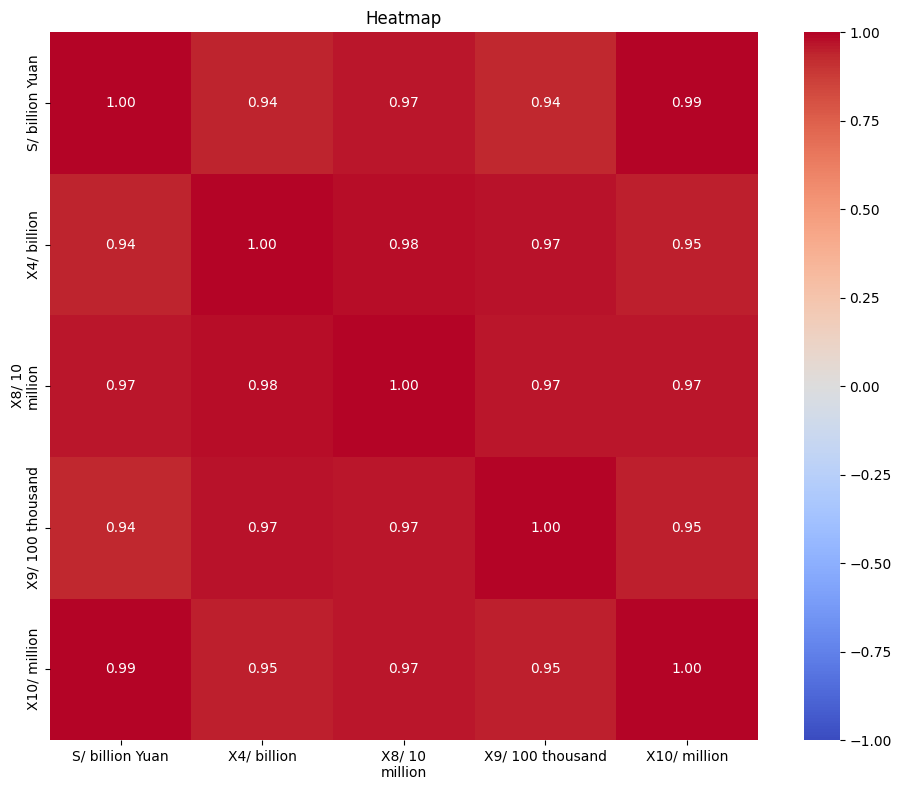

In [30]:
draw_correlation_heatmap(df_sweater_sales.drop(columns=['Date']))

In [31]:
def test_hypothese(ech1, ech2, alpha = 0.5):
    print("H0 : μ1 et μ2 ne sont pas significativement différentes")
    print("H1 : μ1 et μ2 sont significativement différentes")
    m1 = np.mean(ech1)
    m2 = np.mean(ech2)
    n1 = len(ech1)
    n2 = len(ech2)
    std1 = np.sqrt(n1/(n1-1))*np.std(ech1)
    std2 = np.sqrt(n2/(n2-1))*np.std(ech2)
    t = (m1 - m2)/(np.sqrt(((std1 ** 2)/n1)+((std2 ** 2)/n2)))
    t_alpha = norm.ppf(1 - alpha/2)
    print(t)
    print(t_alpha)
    if (abs(t)>t_alpha):
        print("on rejete H0")
    else :
        print("on ne rejete pas H0")

In [32]:
test_hypothese(df_sweater_sales['S/ billion Yuan'], df_dress_sales['S/ billion Yuan'])

H0 : μ1 et μ2 ne sont pas significativement différentes
H1 : μ1 et μ2 sont significativement différentes
-7.964285579458468
0.6744897501960817
on rejete H0


In [33]:
test_hypothese(df_sweater_sales['S/ billion Yuan'], df_pants_sales['S/ billion Yuan'])

H0 : μ1 et μ2 ne sont pas significativement différentes
H1 : μ1 et μ2 sont significativement différentes
-5.754811989459045
0.6744897501960817
on rejete H0


In [34]:
test_hypothese(df_dress_sales['S/ billion Yuan'], df_pants_sales['S/ billion Yuan'])

H0 : μ1 et μ2 ne sont pas significativement différentes
H1 : μ1 et μ2 sont significativement différentes
4.89288560865531
0.6744897501960817
on rejete H0


In [35]:
def pca_manual(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    covariance_matrix = np.cov(centered_data, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    return centered_data, eigenvectors, explained_variance_ratio, eigenvalues

def kaiser_rule(eigenvalues):
    num_components = np.sum(eigenvalues > 1)
    return num_components

def project_data(centered_data, eigenvectors, num_components):
    selected_vectors = eigenvectors[:, :num_components]
    projections = np.dot(centered_data, selected_vectors)
    return projections
    
numeric_cols = df_pants_sales.select_dtypes(include=[np.number]).drop(columns=['S/ billion Yuan'])
data = np.array(numeric_cols)

centered_data, eigenvectors, explained_variance_ratio, eigenvalues = pca_manual(data)

num_components = kaiser_rule(eigenvalues)
print(f"Nombre de composantes principales sélectionnées (règle de Kaiser) : {num_components}")


projections = project_data(centered_data, eigenvectors, num_components)


cumulative_variance = np.cumsum(explained_variance_ratio)
summary_table = pd.DataFrame({
    'Axis': [f"PC{i+1}" for i in range(len(eigenvalues))],
    'Eigenvalues': eigenvalues,
    '% Eigenvalues': explained_variance_ratio * 100,
    '% Cumulative': cumulative_variance * 100
})

Nombre de composantes principales sélectionnées (règle de Kaiser) : 1


In [36]:
summary_table

,Axis,Eigenvalues,% Eigenvalues,% Cumulative
0,PC1,1.406970,97.172635,97.172635
1,PC2,0.030144,2.081921,99.254555
2,PC3,0.007105,0.490740,99.745295
3,PC4,0.003688,0.254705,100.000000


In [37]:
projections_pc1 = projections[:, 0]


df_final_pants_sales = pd.DataFrame(projections_pc1, columns=['PC1'])
df_final_pants_sales['S/ billion Yuan'] = df_pants_sales['S/ billion Yuan'].reset_index(drop=True)


df_final_pants_sales.head()

,PC1,S/ billion Yuan
0,-1.071507,2.23
1,-1.079518,2.14
2,-1.697149,1.72
3,-2.235420,1.46
4,-1.931039,1.86


In [38]:
numeric_cols = df_dress_sales.select_dtypes(include=[np.number]).drop(columns=['S/ billion Yuan'])
data = np.array(numeric_cols)

centered_data, eigenvectors, explained_variance_ratio, eigenvalues = pca_manual(data)

num_components = kaiser_rule(eigenvalues)
print(f"Nombre de composantes principales sélectionnées (règle de Kaiser) : {num_components}")


projections = project_data(centered_data, eigenvectors, num_components)


cumulative_variance = np.cumsum(explained_variance_ratio)
summary_table = pd.DataFrame({
    'Axis': [f"PC{i+1}" for i in range(len(eigenvalues))],
    'Eigenvalues': eigenvalues,
    '% Eigenvalues': explained_variance_ratio * 100,
    '% Cumulative': cumulative_variance * 100
})


Nombre de composantes principales sélectionnées (règle de Kaiser) : 1


In [39]:
summary_table

,Axis,Eigenvalues,% Eigenvalues,% Cumulative
0,PC1,19.338329,99.569583,99.569583
1,PC2,0.064569,0.332452,99.902035
2,PC3,0.010950,0.056379,99.958415
3,PC4,0.008077,0.041585,100.000000


In [40]:
projections_pc1 = projections[:, 0]


df_final_dress_sales = pd.DataFrame(projections_pc1, columns=['PC1'])
df_final_dress_sales['S/ billion Yuan'] = df_dress_sales['S/ billion Yuan'].reset_index(drop=True)


df_final_dress_sales.head()

,PC1,S/ billion Yuan
0,-1.760377,5.29
1,-2.847238,5.66
2,-2.031795,4.87
3,1.377938,3.66
4,2.565095,3.35


In [41]:
numeric_cols = df_sweater_sales.select_dtypes(include=[np.number]).drop(columns=['S/ billion Yuan'])
data = np.array(numeric_cols)

centered_data, eigenvectors, explained_variance_ratio, eigenvalues = pca_manual(data)

num_components = kaiser_rule(eigenvalues)
print(f"Nombre de composantes principales sélectionnées (règle de Kaiser) : {num_components}")


projections = project_data(centered_data, eigenvectors, num_components)


cumulative_variance = np.cumsum(explained_variance_ratio)
summary_table = pd.DataFrame({
    'Axis': [f"PC{i+1}" for i in range(len(eigenvalues))],
    'Eigenvalues': eigenvalues,
    '% Eigenvalues': explained_variance_ratio * 100,
    '% Cumulative': cumulative_variance * 100
})


Nombre de composantes principales sélectionnées (règle de Kaiser) : 1


In [42]:
summary_table

,Axis,Eigenvalues,% Eigenvalues,% Cumulative
0,PC1,41.417428,98.179071,98.179071
1,PC2,0.505473,1.198212,99.377283
2,PC3,0.203349,0.482033,99.859317
3,PC4,0.059348,0.140683,100.000000


In [43]:
projections_pc1 = projections[:, 0]


df_final_sweater_sales = pd.DataFrame(projections_pc1, columns=['PC1'])
df_final_sweater_sales['S/ billion Yuan'] = df_sweater_sales['S/ billion Yuan'].reset_index(drop=True)


df_final_sweater_sales.head()

,PC1,S/ billion Yuan
0,-6.627139,0.63
1,-8.108507,0.46
2,-8.368150,0.42
3,-3.304118,0.91
4,4.576163,1.90


In [44]:
def linear_regression_cov_var(X_train, y_train):
    X_train = X_train.flatten() if len(X_train.shape) > 1 else X_train

    cov_xy = np.cov(X_train, y_train)[0][1]

    var_x = np.var(X_train)
    a = cov_xy / var_x
    b = np.mean(y_train) - a * np.mean(X_train)
    return a, b

def predict(X, a, b):
    return a * X + b

def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, rmse, r2

def plot_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, category, mse, mae, rmse, r2):
    plt.figure(figsize=(10, 8))

    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.plot(X_train, y_train_pred, color='red', label='Training Prediction')

    plt.scatter(X_test, y_test, color='green', label='Test Data')
    plt.plot(X_test, y_test_pred, color='orange', label='Test Prediction')

    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

    # Add statistics to the plot
    stats_text = f"""
    Mean Squared Error: {mse:.2f}
    Mean Absolute Error: {mae:.2f}
    RMSE: {rmse:.2f}
    R-squared: {r2:.2f}
    """
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=12,
                   verticalalignment='top', horizontalalignment='right', color='black', bbox=dict(facecolor='white', alpha=0.7))

    plt.title(f"Linear Regression Results: {category}")
    plt.show()

def run_linear_regression(df, target_column, category):
    X = df.drop(columns=[target_column]).values 
    y = df[target_column].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    a, b = linear_regression_cov_var(X_train, y_train)
    
    y_train_pred = predict(X_train, a, b)
    y_test_pred = predict(X_test, a, b)
    
    mse, mae, rmse, r2 = evaluate_model(y_test, y_test_pred)
    
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")
    
    plot_results(X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, category, mse, mae, rmse, r2)


Mean Squared Error: 0.08
Mean Absolute Error: 0.20
Root Mean Squared Error: 0.29
R-squared: 0.94


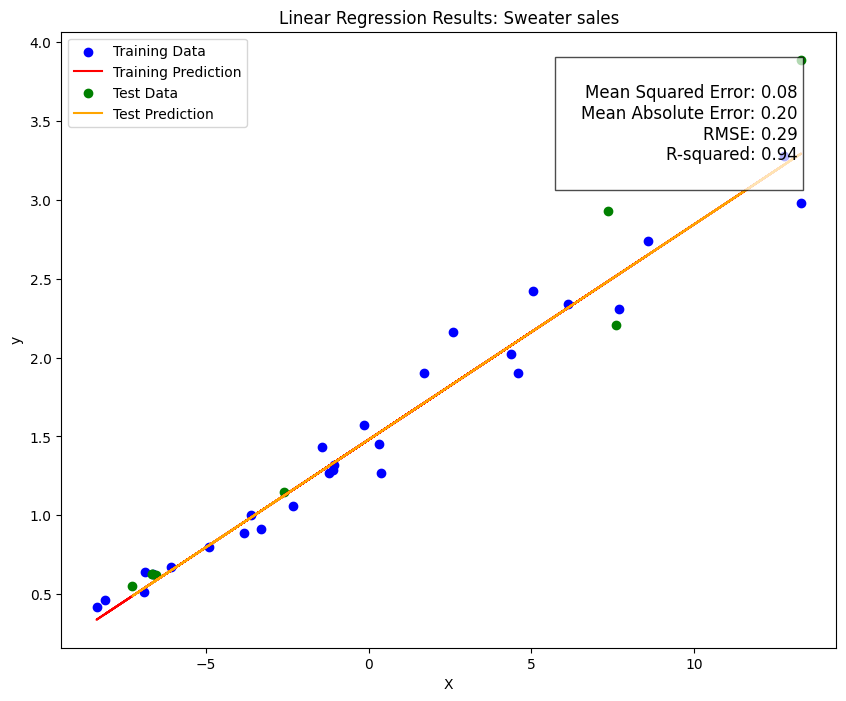

In [45]:
run_linear_regression(df_final_sweater_sales, 'S/ billion Yuan', 'Sweater sales')

Mean Squared Error: 0.19
Mean Absolute Error: 0.39
Root Mean Squared Error: 0.44
R-squared: 0.65


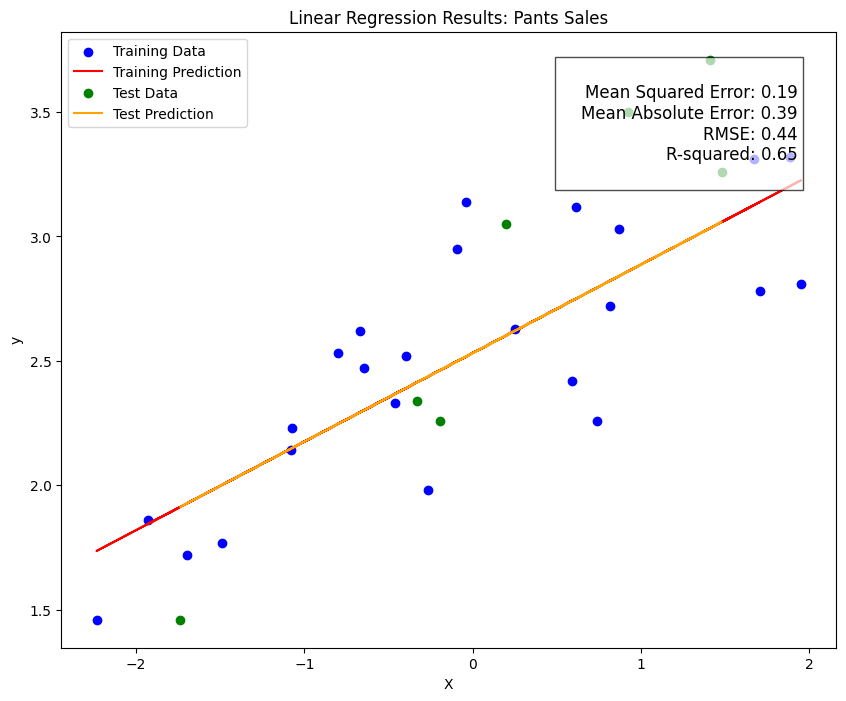

In [46]:
run_linear_regression(df_final_pants_sales, 'S/ billion Yuan', 'Pants Sales')

Mean Squared Error: 0.63
Mean Absolute Error: 0.65
Root Mean Squared Error: 0.79
R-squared: 0.83


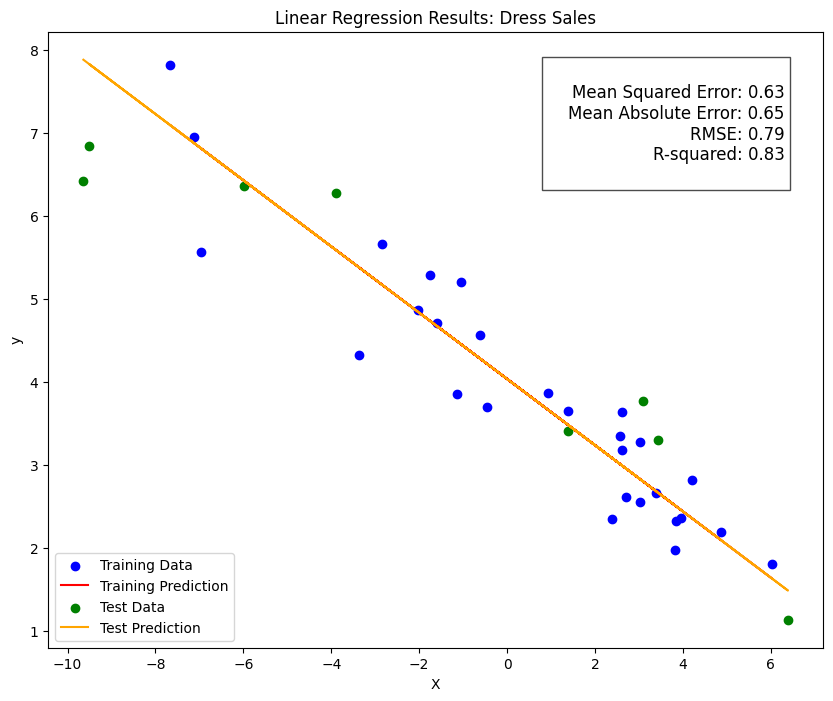

In [47]:
run_linear_regression(df_final_dress_sales, 'S/ billion Yuan', 'Dress Sales')

Mean Squared Error: 0.11
Mean Absolute Error: 0.30
Root Mean Squared Error: 0.33
R-squared: 0.38


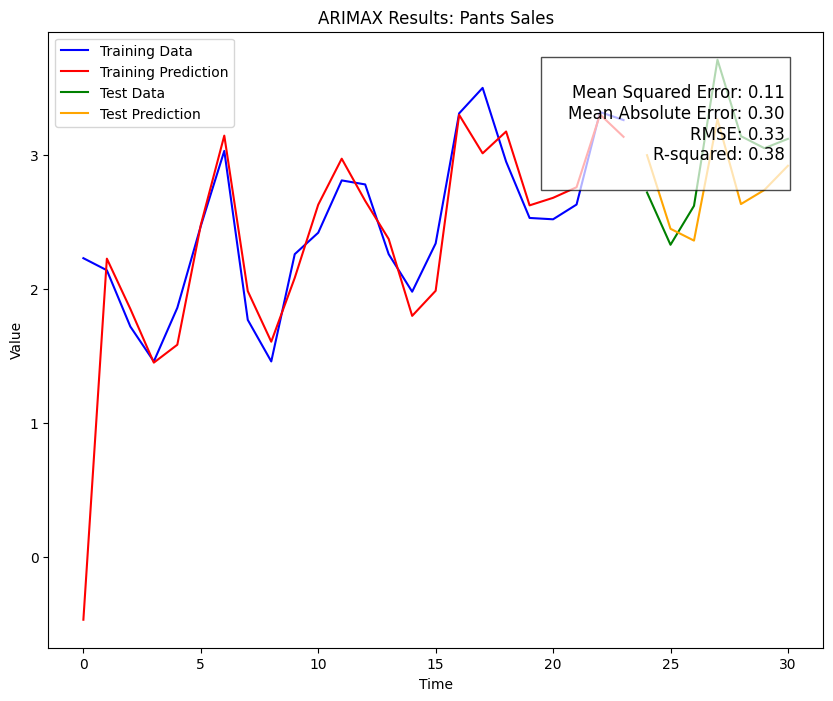

In [62]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Function to evaluate the model performance
def evaluate_arimax(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Function to plot the results
def plot_arimax_results(train_data, test_data, train_pred, test_pred, category, mse, mae, rmse, r2):
    plt.figure(figsize=(10, 8))
    plt.plot(train_data.index, train_data, color='blue', label='Training Data')
    plt.plot(train_data.index, train_pred, color='red', label='Training Prediction')
    plt.plot(test_data.index, test_data, color='green', label='Test Data')
    plt.plot(test_data.index, test_pred, color='orange', label='Test Prediction')
    
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    
    stats_text = f"""
    Mean Squared Error: {mse:.2f}
    Mean Absolute Error: {mae:.2f}
    RMSE: {rmse:.2f}
    R-squared: {r2:.2f}
    """
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=12,
                   verticalalignment='top', horizontalalignment='right', 
                   bbox=dict(facecolor='white', alpha=0.7))
    plt.title(f"ARIMAX Results: {category}")
    plt.show()

# Function to fit ARIMAX model
def fit_arimax(data, exog, order=(1,1,1)):
    model = ARIMA(data, 
                  exog=exog,
                  order=order)
    results = model.fit()
    return results

# Main function to run ARIMAX analysis
def run_arimax_analysis(df, target_column, exog_columns, category, 
                        order=(1,1,1), train_size=0.8):
    # Prepare time series data
    series = df[target_column]
    exog = df[exog_columns]
    
    train_size = int(len(series) * train_size)
    
    train_data = series[:train_size]
    test_data = series[train_size:]
    
    train_exog = exog[:train_size]
    test_exog = exog[train_size:]
    
    # Fit model
    model = fit_arimax(train_data, train_exog, order)
    
    # Generate predictions
    train_pred = model.get_prediction(start=0, end=len(train_data)-1, exog=train_exog).predicted_mean
    test_pred = model.get_forecast(len(test_data), exog=test_exog).predicted_mean
    
    # Evaluate
    mse, mae, rmse, r2 = evaluate_arimax(test_data, test_pred)
    
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")
    
    # Plot
    plot_arimax_results(train_data, test_data, train_pred, test_pred, 
                        category, mse, mae, rmse, r2)
    
    return model

# Example usage of the function
# Make sure to replace 'df_final_pants_sales' with your actual DataFrame
run_arimax_analysis(df_final_pants_sales, 
                    target_column='S/ billion Yuan', 
                    exog_columns=['PC1'],  # pass this as a list
                    category='Pants Sales', 
                    order=(1, 1, 1),  # ARIMAX order
                    train_size=0.8)  # proportion of data for training


In [67]:
def calculate_best_arimax_order(df, target_column, exog_columns, max_order=2, num_threads=4):
    series = df[target_column]
    exog = df[exog_columns] if exog_columns else None
    
    # Reduced search space for orders
    p_values = range(0, max_order + 1)  # AR order (p)
    d_values = range(0, 2)  # Differencing (d)
    q_values = range(0, max_order + 1)  # MA order (q)
    
    best_aic = np.inf
    best_order = None
    
    combinations = list(itertools.product(p_values, d_values, q_values))
    total_combinations = len(combinations)
    
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        futures = {}
        
        # Submit tasks to executor with a counter
        for counter, (p, d, q) in enumerate(combinations, start=1):
            futures[executor.submit(fit_arimax, series, exog, (p, d, q), counter, total_combinations)] = (p, d, q)
        
        # Collect results and update best parameters
        for future in as_completed(futures):
            aic, order = future.result()
            if aic < best_aic:
                best_aic = aic
                best_order = order
                print(f"New best order: {best_order}, AIC: {best_aic}")
    
    if best_order is None:
        print("No valid order found")
    else:
        print(f"Best Order: {best_order}, Best AIC: {best_aic}")
    
    return best_order, best_aic

# Example usage with a reduced search space
best_order, best_aic = calculate_best_arimax_order(
    df_final_pants_sales, 
    target_column='S/ billion Yuan', 
    exog_columns=['PC1'],  # Using a single exogenous variable
    max_order=100,  # Maximum order for AR and MA
    num_threads=8)  # Use 8 threads for parallelization

print(f"Best Order: {best_order}")
print(f"Best AIC: {best_aic}")


Attempt 1/20402
Attempt 2/20402
Attempt 3/20402
Attempt 4/20402
Attempt 5/20402
Attempt 6/20402
Attempt 7/20402
Attempt 8/20402
Attempt 9/20402
Attempt 10/20402
Attempt 11/20402
Attempt 12/20402
Attempt 13/20402
Attempt 14/20402
Attempt 15/20402
Attempt 16/20402
Attempt 17/20402
Attempt 18/20402
Attempt 19/20402
Attempt 20/20402
Attempt 21/20402
Attempt 22/20402
Attempt 23/20402
Attempt 24/20402
Attempt 25/20402
Attempt 26/20402
Attempt 27/20402
Attempt 28/20402
Attempt 29/20402
Attempt 30/20402
Attempt 31/20402
Attempt 32/20402
Attempt 33/20402
Attempt 34/20402
Attempt 35/20402
Attempt 36/20402
Attempt 37/20402
Attempt 38/20402
Attempt 39/20402
Attempt 40/20402
Attempt 41/20402
Attempt 42/20402
Attempt 43/20402
Attempt 44/20402
Attempt 45/20402
Attempt 46/20402
Attempt 47/20402
Attempt 48/20402
Attempt 49/20402
Attempt 50/20402
Attempt 51/20402
Attempt 52/20402
Attempt 53/20402
Attempt 54/20402
Attempt 55/20402
Attempt 56/20402
Attempt 57/20402
Attempt 58/20402
Attempt 59/20402
Attemp

Mean Squared Error: 0.11
Mean Absolute Error: 0.27
Root Mean Squared Error: 0.34
R-squared: 0.34


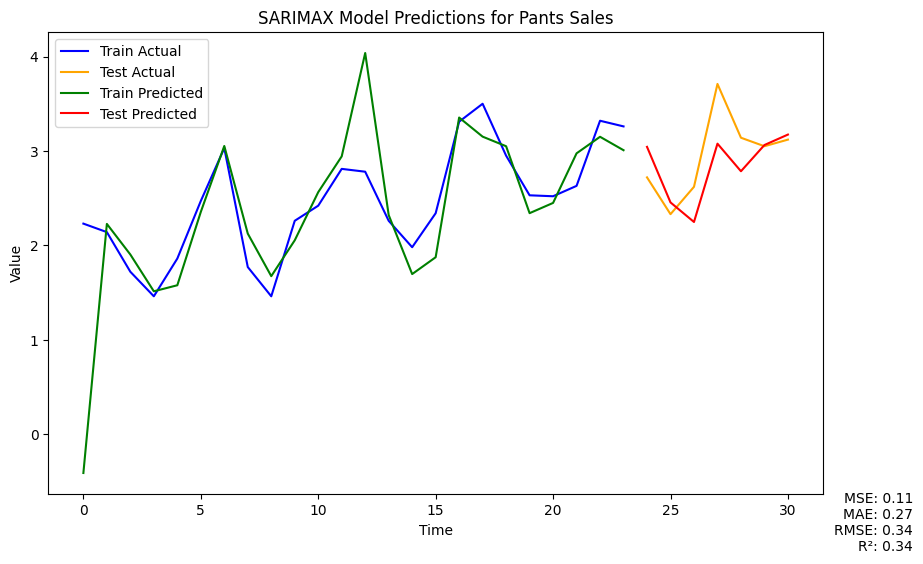

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to fit the SARIMAX model
def fit_sarimax(data, exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    model = SARIMAX(data, 
                    exog=exog,
                    order=order,
                    seasonal_order=seasonal_order)
    results = model.fit()
    return results

# Function to evaluate the model's performance
def evaluate_sarimax(true_values, predictions):
    mse = mean_squared_error(true_values, predictions)
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predictions)
    return mse, mae, rmse, r2

# Function to plot the results
def plot_sarimax_results(train_data, test_data, train_pred, test_pred, category, mse, mae, rmse, r2):
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Train Actual', color='blue')
    plt.plot(test_data.index, test_data, label='Test Actual', color='orange')
    plt.plot(train_data.index, train_pred, label='Train Predicted', color='green')
    plt.plot(test_data.index, test_pred, label='Test Predicted', color='red')
    
    plt.title(f'SARIMAX Model Predictions for {category}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(loc='upper left')
    
    plt.figtext(0.99, 0.01, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}',
                horizontalalignment='right', verticalalignment='bottom', fontsize=10)
    
    plt.show()

# Main function to run the SARIMAX analysis
def run_sarimax_analysis(df, target_column, exog_columns, category, 
                         order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), 
                         train_size=0.8):
    # Prepare time series data
    series = df[target_column]
    exog = df[exog_columns]
    
    train_size = int(len(series) * train_size)
    
    train_data = series[:train_size]
    test_data = series[train_size:]
    
    train_exog = exog[:train_size]
    test_exog = exog[train_size:]
    
    # Fit model (with counter and total_combinations)
    model = fit_sarimax(train_data, train_exog, order, seasonal_order)
    
    # Generate predictions
    train_pred = model.get_prediction(start=0, end=len(train_data)-1, exog=train_exog).predicted_mean
    test_pred = model.get_forecast(len(test_data), exog=test_exog).predicted_mean
    
    # Evaluate the model performance
    mse, mae, rmse, r2 = evaluate_sarimax(test_data, test_pred)
    
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")
    
    # Plot the results
    plot_sarimax_results(train_data, test_data, train_pred, test_pred, 
                         category, mse, mae, rmse, r2)
    
    return model

# Example usage of the function
# Make sure to replace 'df_final_pants_sales' with your actual DataFrame
run_sarimax_analysis(df_final_pants_sales, 
                     target_column='S/ billion Yuan', 
                     exog_columns=['PC1'],  # pass this as a list
                     category='Pants Sales', 
                     order=(1, 1, 1),  # SARIMAX order
                     seasonal_order=(1, 1, 1, 12),  # SARIMAX seasonal_order
                     train_size=0.8)  # proportion of data for training
